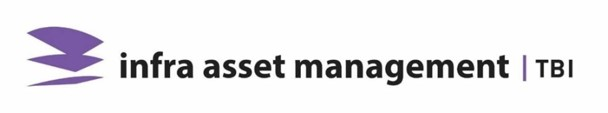

# optie voor schrijven van class 
is het beter om een class op te bouwen voor het opstellen van de storingsanalyse? zo kunnen de metadata en de data uit de export in die class gelijk gekoppeld worden. is ook gunstig voor het berekenen van totale gemiddelde en het wegschrijven van de export data naar de metadata.json.

## Importeren van de benodigdheden

### Python packages 

In [1]:
import os
import json
import pandas as pd

from datetime import datetime

from metadata_storingsanalyse import MetadataStoringsAnalyse

### Working directory veranderen
Voor het actueel houden van de paden de resource documenten en/of data bestanden wordt de working directory van deze code veranderd zodat deze gelijk is aan de rootfolder van de github repository.

In [2]:
while 1:
    if os.getcwd().endswith('storingsanalyse-generator'):
        break 
    else:
        os.chdir('..')
        
print(f'New working directory = {os.getcwd()}')

New working directory = C:\Users\NBais\OneDrive - TBI Holding\Documenten\GitHub\storingsanalyse-generator


### Importeren van ondersteunende DataFrames

#### Description_df
Dit DataFrame bevat de namen van de SBS en LBS nummers.

In [3]:
#tabel inlezen
rel_path = f'res\\location_description_map.json'
with open(rel_path, 'r') as r:
    description_data = json.load(r)

# Df for the connection between the sbs/lbs numbers and their description
description_df = pd.DataFrame(description_data)

In [74]:
description_df

,description,location
0,,CT1EN2
1,Magazijn Coentunnel 1 en 2,CTMAG
2,CT1EN2,1000
3,CT1,1001
4,CT2,1002
...,...,...
1151,Rotatiepaneel 17_2 4.260 HRR 3 t/m 5,47A-18
1152,Rotatiepaneel 17_3 4.690 HRR 3 t/m 5,47A-19
1153,Rotatiepaneel 17_4 4.260 HRL 5,47A-20
1154,,CMTESTWEAVER


#### Metadata
Dit is een json met alle data van een project die niet verkregen kan worden door mideel van het bevragen van de Maximo database.

In [4]:
rel_path = 'src\\rapport generator\\metadata_file_coentunnel-tracé.json'
with open(rel_path, 'r') as mf:
    _metadata = json.load(mf)

In [5]:
_metadata

{'project': 'Coentunnel-tracÃ©',
 'start_datum': '01_2016',
 'contract_info': {'tijdsregistratie': 'True',
  'minimale_beschikbaarheid': 'xx',
  'minimale_responsetijd': '04:00:00'},
 'meldingen': {'01_2016': {'45': 6,
   '61': 5,
   '23': 1,
   '43': 4,
   '41': 3,
   '46B': 3,
   '46A': 1,
   '44': 2,
   '97': 1,
   '21': 1,
   '48': 1,
   '15': 6,
   '74': 2,
   '36': 2,
   '59': 1,
   '50': 5,
   '67': 1,
   '40': 1,
   '90': 1,
   '92': 1},
  '02_2016': {'45': 19,
   '61': 4,
   '23': 13,
   '63': 4,
   '43': 1,
   '41': 7,
   '0': 3,
   '46B': 1,
   '46A': 1,
   '44': 7,
   '24': 1,
   '97': 1,
   '71': 8,
   '15': 6,
   '64': 1,
   '50': 2,
   '75': 1,
   '12': 1},
  '03_2016': {'45': 10,
   '61': 8,
   '63': 2,
   '43': 12,
   '41': 1,
   '0': 4,
   '46B': 1,
   '46A': 7,
   '24': 2,
   '21': 1,
   '71': 1,
   '86': 1,
   '64': 2,
   '59': 1,
   '67': 1,
   '80': 1},
  '04_2016': {'45': 6,
   '61': 4,
   '63': 3,
   '43': 12,
   '41': 3,
   '46B': 1,
   '46A': 2,
   '44': 2,
  

In [6]:
metadata = pd.json_normalize(data=_metadata, max_level=0)
metadata

,project,start_datum,contract_info,meldingen,storingen
0,Coentunnel-tracÃ©,01_2016,"{'tijdsregistratie': 'True', 'minimale_beschik...","{'01_2016': {'45': 6, '61': 5, '23': 1, '43': ...","{'01_2016': {'61': 3, '43': 2, '45': 3, '41': ..."


In [7]:
contract_info = pd.json_normalize(data=metadata['contract_info'])
print('De inhoud van contract_info is ter illutratie van de mogenlijkheden.')
contract_info

De inhoud van contract_info is ter illutratie van de mogenlijkheden.


,tijdsregistratie,minimale_beschikbaarheid,minimale_responsetijd
0,True,xx,04:00:00


In [8]:
meldingen_hist = pd.json_normalize(data=metadata['meldingen'], max_level=0)
meldingen_hist

,01_2016,02_2016,03_2016,04_2016,05_2016,06_2016,07_2016,08_2016,09_2016,10_2016,...,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020
0,"{'45': 6, '61': 5, '23': 1, '43': 4, '41': 3, ...","{'45': 19, '61': 4, '23': 13, '63': 4, '43': 1...","{'45': 10, '61': 8, '63': 2, '43': 12, '41': 1...","{'45': 6, '61': 4, '63': 3, '43': 12, '41': 3,...","{'45': 9, '61': 18, '63': 5, '43': 7, '41': 8,...","{'45': 12, '61': 4, '23': 4, '63': 5, '43': 2,...","{'45': 17, '61': 7, '23': 15, '63': 1, '43': 4...","{'45': 10, '61': 3, '23': 14, '43': 3, '41': 4...","{'45': 4, '61': 2, '23': 1, '63': 2, '43': 1, ...","{'61': 4, '23': 7, '63': 4, '43': 5, '41': 3, ...",...,"{'45': 7, '61': 1, '41': 2, '0': 1, '46B': 12,...","{'45': 1, '61': 11, '63': 1, '43': 1, '41': 2,...","{'45': 6, '61': 3, '41': 1, '46B': 1, '24': 1,...","{'45': 1, '61': 2, '43': 1, '24': 1, '64': 1, ...","{'45': 2, '61': 2, '63': 1, '43': 1, '41': 1, ...","{'61': 4, '63': 1, '43': 2, '0': 3, '46A': 2, ...","{'45': 1, '61': 5, '23': 7, '43': 1, '41': 10,...","{'45': 2, '61': 2, '63': 1, '43': 1, '41': 1, ...","{'61': 4, '63': 1, '43': 2, '0': 3, '46A': 2, ...","{'45': 1, '61': 5, '23': 7, '43': 1, '41': 10,..."


In [9]:
storingen_hist = pd.json_normalize(data=metadata['storingen'], max_level=0)  # Met record_prefix=xx  => xx.col_name
storingen_hist

,01_2016,02_2016,03_2016,04_2016,05_2016,06_2016,07_2016,08_2016,09_2016,10_2016,...,09_2019,10_2019,11_2019,12_2019,01_2020,02_2020,03_2020,04_2020,05_2020,06_2020
0,"{'61': 3, '43': 2, '45': 3, '41': 3, '23': 1, ...","{'61': 2, '45': 2, '41': 4, '63': 2, '23': 13,...","{'61': 4, '43': 7, '45': 3, '41': 1, '63': 1, ...","{'61': 2, '43': 12, '45': 3, '41': 1, '63': 1,...","{'61': 17, '43': 6, '45': 5, '41': 2, '24': 1,...","{'61': 4, '43': 1, '45': 7, '41': 5, '63': 1, ...","{'61': 4, '43': 3, '45': 2, '41': 5, '23': 11,...","{'61': 3, '43': 3, '45': 3, '41': 1, '23': 14,...","{'61': 2, '43': 1, '63': 1, '23': 1, '46B': 2,...","{'61': 2, '43': 5, '41': 3, '63': 1, '24': 3, ...",...,"{'45': 1, '41': 2, '46B': 10, '86': 1, '84': 1...","{'61': 3, '43': 1, '45': 1, '63': 1, '46A': 1,...","{'45': 2, '46B': 1, '24': 1, '71': 3, '47A': 1...","{'61': 1, '43': 1, '24': 1, '30': 1, '64': 1, ...","{'43': 1, '45': 1, '63': 1, '71': 2, '74': 1, ...","{'61': 1, '46B': 2, '47A': 2, '84': 1, '52': 1...","{'61': 1, '43': 2, '41': 1, '71': 4, '74': 1, ...","{'61': 1, '43': 1, '45': 2, '41': 1, '46B': 1,...","{'61': 2, '46A': 2, '74': 1, '21': 2, '62': 1,...","{'61': 1, '45': 1, '41': 3, '23': 6, '46B': 3,..."


##### Test van het aanroepen van de waarden
De waarden van meldingen/storingen per maand worden gepresenteerd in de vorm **SBS: aantal meldingen**

In [10]:
meldingen_01_2016 = meldingen_hist['01_2016'][0]
meldingen_01_2016

{'45': 6,
 '61': 5,
 '23': 1,
 '43': 4,
 '41': 3,
 '46B': 3,
 '46A': 1,
 '44': 2,
 '97': 1,
 '21': 1,
 '48': 1,
 '15': 6,
 '74': 2,
 '36': 2,
 '59': 1,
 '50': 5,
 '67': 1,
 '40': 1,
 '90': 1,
 '92': 1}

### Alternatief voor het omgaan met de metadata

In [11]:
metadata = MetadataStoringsAnalyse(filepath=rel_path)
metadata.get_all_data()

,project,start_datum,contract_info,meldingen,storingen
0,Coentunnel-tracÃ©,01_2016,"{'tijdsregistratie': 'True', 'minimale_beschik...","{'01_2016': {'45': 6, '61': 5, '23': 1, '43': ...","{'01_2016': {'61': 3, '43': 2, '45': 3, '41': ..."


In [12]:
metadata.meldingen()

{'01_2016': {'45': 6,
  '61': 5,
  '23': 1,
  '43': 4,
  '41': 3,
  '46B': 3,
  '46A': 1,
  '44': 2,
  '97': 1,
  '21': 1,
  '48': 1,
  '15': 6,
  '74': 2,
  '36': 2,
  '59': 1,
  '50': 5,
  '67': 1,
  '40': 1,
  '90': 1,
  '92': 1},
 '02_2016': {'45': 19,
  '61': 4,
  '23': 13,
  '63': 4,
  '43': 1,
  '41': 7,
  '0': 3,
  '46B': 1,
  '46A': 1,
  '44': 7,
  '24': 1,
  '97': 1,
  '71': 8,
  '15': 6,
  '64': 1,
  '50': 2,
  '75': 1,
  '12': 1},
 '03_2016': {'45': 10,
  '61': 8,
  '63': 2,
  '43': 12,
  '41': 1,
  '0': 4,
  '46B': 1,
  '46A': 7,
  '24': 2,
  '21': 1,
  '71': 1,
  '86': 1,
  '64': 2,
  '59': 1,
  '67': 1,
  '80': 1},
 '04_2016': {'45': 6,
  '61': 4,
  '63': 3,
  '43': 12,
  '41': 3,
  '46B': 1,
  '46A': 2,
  '44': 2,
  '24': 4,
  '97': 4,
  '15': 1,
  '74': 1,
  '84': 1,
  '88': 1,
  '36': 1},
 '05_2016': {'45': 9,
  '61': 18,
  '63': 5,
  '43': 7,
  '41': 8,
  '0': 4,
  '46A': 1,
  '44': 1,
  '24': 1,
  '97': 3,
  '21': 1,
  '71': 1,
  '86': 1,
  '62': 3,
  '88': 2,
  '59

In [13]:
metadata.storingen()

{'01_2016': {'61': 3,
  '43': 2,
  '45': 3,
  '41': 3,
  '23': 1,
  '46B': 1,
  '44': 1,
  '74': 2,
  '21': 1,
  '15': 2,
  '36': 2,
  '67': 1,
  '92': 1},
 '02_2016': {'61': 2,
  '45': 2,
  '41': 4,
  '63': 2,
  '23': 13,
  '44': 7,
  '71': 5,
  '15': 1,
  '75': 1},
 '03_2016': {'61': 4,
  '43': 7,
  '45': 3,
  '41': 1,
  '63': 1,
  '24': 2,
  '46A': 1,
  '71': 1,
  '86': 1,
  '67': 1,
  '64': 1,
  '80': 1},
 '04_2016': {'61': 2,
  '43': 12,
  '45': 3,
  '41': 1,
  '63': 1,
  '46B': 1,
  '24': 2,
  '44': 1,
  '74': 1,
  '15': 1,
  '84': 1,
  '36': 1},
 '05_2016': {'61': 17,
  '43': 6,
  '45': 5,
  '41': 2,
  '24': 1,
  '46A': 1,
  '44': 1,
  '71': 1,
  '86': 1,
  '88': 2,
  '62': 2,
  '59': 1},
 '06_2016': {'61': 4,
  '43': 1,
  '45': 7,
  '41': 5,
  '63': 1,
  '23': 4,
  '46A': 1,
  '71': 1,
  '48': 1,
  '67': 1,
  '59': 2},
 '07_2016': {'61': 4,
  '43': 3,
  '45': 2,
  '41': 5,
  '23': 11,
  '24': 6,
  '46A': 2,
  '44': 2,
  '15': 2,
  '52': 2,
  '80': 1},
 '08_2016': {'61': 3,
  '4

### Defninieren van de functies

#### get_breakdown_description()

Deze functie doorzoekt het ondersteunende df 'description_df' op het ingevoerde SBS of LBS nummer en geeft de omschrijving als resultaat. 

In [14]:
def get_breakdown_description(sbs_lbs):
    global description_df
    description = [description_df.loc[str(index), 'description']
                   for index in range(description_df.shape[0])
                   if sbs_lbs == description_df.loc[str(index), 'location']]
    return description if len(description) > 0 else [""]  # To cover empty rows

In [15]:
def month_num_to_name(month_num):
    maand_dict = {"1": "Januari", "2": "Februari", "3": "Maart", "4": "April", "5": "Mei", "6": "Juni", "7": "Juli", "8": "Augustus", "9": "September", "10": "Oktober", "11": "November", "12": "December",}
    maand = [maand_dict[str(num)] for num in month_num for key in maand_dict.keys() if str(num) == key]
    return maand

In [16]:
def isolate_di_number(asset_num_string):
    return asset_num_string.split('-')[0]

In [17]:
def order_frequency_table(freq_table):
    return {key: value for key, value in sorted(freq_table.items(), key=lambda item: item[1], reverse=True)}

In [18]:
def make_frequency_table(di_series):
    freq_table = {}
    for index, value in di_series.iteritems():
        di_num = isolate_di_number(index)
        if di_num in freq_table:
            freq_table[di_num] += value
        else:
            freq_table[di_num] = value
    return order_frequency_table(freq_table)

## Importeren van de staging_file

In [19]:
sf_path = 'src/staging file/staging_file.xlsx'
sf_data = pd.read_excel(sf_path)
sf_data.head()

,werkorder,status,rapport datum,month_number,werkorder beschrijving,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,...,werkelijke start,tijdstip einde werkzaamheden,tijdstip afmelding,tijdstip validatie,funcitoneel herstel,definitief herstel,is financieel nadeel,gmblocation3,gemeld asset,vestiging
0,1178992,SLUIT,04-01-18 15:28:00,1,"D3830570 A10, , hm-paal 32,410. P rijstrook 1 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:42:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
1,1178993,SLUIT,06-01-18 00:32:00,1,D3830580 Coentunnel Intercom instalaltie koppe...,NaN,NaN,NaN,NaN,NaN,...,NaN,06-01-18 11:23:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
2,1178994,SLUIT,06-01-18 20:18:00,1,D3830595 Coentunnel Overdruk pompruimte en kel...,NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:46:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
3,1178995,SLUIT,07-01-18 07:50:00,1,"D3830605 A10 . Westbuis, pompkelder. Er is gee...",NaN,NaN,NaN,NaN,NaN,...,NaN,08-01-18 14:44:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
4,1180768,SLUIT,08-01-18 17:10:00,1,D3830630 Afsluitboom Noord Rechts is niet besc...,C1279,"A10 AB 30,670n BBL (AK) - Afsluitboomkast (boo...",45-02,(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan,NaN,...,NaN,08-01-18 17:36:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2


### Aanpassen van de staging_file -- DEZE STAP WORDT VERWIJDERD IN DE TOEKOMST
Het opbouwen van deze automatische storingsanalyse vraagt om een ingevulde kolom 'type melding'. Om het process van opbouwen niet te laten stagneren op dit aspect, wordt er hieronder fictive data gegenereerd. Met behulp van de fictieve data wordt het genereren van de verschillende tabellen en grafieken gebouwd.

In [20]:
from random import randrange

lijst_opties = ['Storing', 'Incident', 'Preventief', 'Onterecht']

random_ranges = [lijst_opties[randrange(0, 4, 1)] for _ in range(len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))]

print(len(random_ranges) == len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))

sf_data.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'] = random_ranges

random_ranges[:10]

True


['Onterecht',
 'Incident',
 'Onterecht',
 'Onterecht',
 'Preventief',
 'Preventief',
 'Storing',
 'Preventief',
 'Preventief',
 'Preventief']

In [21]:
import numpy as np
lijst_opties = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['probleemcode']))]

print(len(random_ranges) == len(sf_data['probleemcode']))

sf_data.loc[:, 'probleemcode'] = random_ranges

random_ranges[:10]

True


['P01', nan, 'P02', 'P07', 'P01', 'P06', 'P11', 'P10', 'P01', 'P06']

In [22]:
lijst_opties = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 
                'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oorzaak code']))]

print(len(random_ranges) == len(sf_data['oorzaak code']))

sf_data.loc[:, 'oorzaak code'] = random_ranges

random_ranges[:10]

True


['C11', 'C06', 'C10', 'C01', 'C16', 'C04', 'C07', 'C05', 'C12', 'C03']

In [23]:
lijst_opties = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', np.nan]

random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oplos code']))]

print(len(random_ranges) == len(sf_data['oplos code']))

sf_data.loc[:, 'oplos code'] = random_ranges

random_ranges[:10]

True


['S08', nan, nan, nan, 'S07', 'S02', 'S05', 'S01', 'S06', 'S02']

In [24]:
sf_data.iloc[:5, 15:25]

,locatie 2,locatie 2 omschrijving,probleemcode,beschrijving probleem,oorzaak code,beschrijving oorzaak,oplos code,oplossing beschrijving,uitgevoerde werkzaamheden,type melding (Storing/Incident/Preventief/Onterecht)
0,NaN,NaN,P01,Lussen vermoedelijk vekeerd om aangesloten,C11,Davinci,S08,NaN,Storing ontvangen op 4 januari 2018 om 15:28 g...,Onterecht
1,NaN,NaN,NaN,Intercom installatie niet beschikbaar,C06,NaN,NaN,NaN,Storing ontvangen op 6 januari 2018 om 0:23 ge...,Incident
2,NaN,NaN,P02,Overdruk ruimte pompkelder niet aanwezig,C10,Vorst bewaking,NaN,NaN,Storing ontvangen op 6 juniari 2018 om 20:18 g...,Onterecht
3,NaN,NaN,P07,Geen overdruk aanwezig pompkelders CT1,C01,NaN,NaN,NaN,Storing ontvangen op 7 januari 2018 om 7:50 ge...,Onterecht
4,NaN,NaN,P01,Afsluitboom Noord W2 rechts melding niet besch...,C16,NaN,S07,NaN,Storing ontvangen op 8 januari 2018 om 17:10 g...,Preventief


In [25]:
sf_data.iloc[:5, 5:15]

,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,locatie omschrijving,asset nummer 2,asset beschrijving 2,sbs 2,sbs 2 omschrijving
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C1279,"A10 AB 30,670n BBL (AK) - Afsluitboomkast (boo...",45-02,(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse

## Aantal meldingen per maand

Variablelen die opgehaald moeten worden
•   Het totaal aantal meldingen in 2020
•	Het gemiddelde aantal meldingen per maand
•	Hoogste aantal meldingen in de maand [maand]
•	Laagste aantal meldingen in de maanden [maand]
•	Het gemiddelde aantal meldingen per maand vanaf 2016

In [26]:
totaal_aantal_meldingen = len(sf_data.index)
print(f'Het totaal aantal meldingen in 2020: {totaal_aantal_meldingen} meldingen')

Het totaal aantal meldingen in 2020: 99 meldingen


In [27]:
meldingen_per_maand = sf_data['month_number'].value_counts()
meldingen_per_maand

2    45
1    30
3    24
Name: month_number, dtype: int64

In [28]:
gemiddelde_per_maand = sum(meldingen_per_maand) / len(meldingen_per_maand)
print(f'Het gemiddelde aantal meldingen per maand: {gemiddelde_per_maand} meldingen')

Het gemiddelde aantal meldingen per maand: 33.0 meldingen


In [29]:
num_maand_meeste_meldingen = [meldingen_per_maand.index[meldingen_per_maand == max(meldingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_meeste_meldingen)
print(f'Hoogste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Hoogste aantal meldingen in de maanden {maand}')

Hoogste aantal meldingen in de maand Februari


In [30]:
num_maand_min_meldingen = [meldingen_per_maand.index[meldingen_per_maand == min(meldingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_min_meldingen)
print(f'Laagste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Laagste aantal meldingen in de maanden {maand}')

Laagste aantal meldingen in de maand Maart


In [31]:
data_2019 = [key for key in metadata.meldingen().keys() if '2019' in key]
meldingen_2019 = metadata.sum_values(dictionary=metadata.meldingen(), keys=data_2019)
print(f'Het totale aantal meldingen in 2019 was {meldingen_2019} meldingen.')

Het totale aantal meldingen in 2019 was 274 meldingen.


In [32]:
jaarlijks_gemiddelde = metadata.avg_yearly(dictionary=metadata.meldingen(), exclude_year='2020')
print(f"Het gemiddelde aantal meldingen per jaar vanaf begin project is {jaarlijks_gemiddelde} meldingen.")

Het gemiddelde aantal meldingen per jaar vanaf begin project is 451.5 meldingen.


In [33]:
maanden = metadata.get_month_list(exclude_year='2020')
maandenandelijks_gemiddelde = metadata.avg_monthly(dictionary=metadata.meldingen(), keys=maanden)
print(f"Het gemiddelde aantal meldingen per maand vanaf begin project is {maandenandelijks_gemiddelde} meldingen.")

Het gemiddelde aantal meldingen per maand vanaf begin project is 37.625 meldingen.


## Aantal meldingen per deelinstallatie

Variabelen die opgehaald moeten worden:

|naam DI|aantal meldingen|% van totaal aantal meldingen|
|-------|----------------|-----------------------------|

De X meldingen van 2020 zijn onder te verdelen in X_storing storingen, X_onterecht onterechte meldingen, X_preventief preventief onderhoud / modificatie en X_incident incidenten. waarbij X_ een subsectie is van X, met X = totaal_aantal_meldingen.

In [34]:
meldingen_per_di = sf_data['sbs'].value_counts()  # value_counts(dropna=False) geeft ook NaN + count in df (default True)
meldingen_per_di

46A-08         4
41-26          4
45-02          2
45-10          2
67-03          2
45-12          2
43-05          2
45-13          1
63-12          1
45-05          1
23-17          1
41-07          1
61-11          1
74-05          1
46A-07         1
45-08          1
62-16          1
51 EN 53-06    1
84-15          1
74-07          1
46B-04         1
21-01          1
41-17          1
47A-13         1
45-04          1
74-01          1
74-03          1
41-18          1
71-23          1
61-02          1
71-01          1
86-22          1
Name: sbs, dtype: int64

In [35]:
di_meldingen_frequency_table = make_frequency_table(meldingen_per_di)

In [36]:
di_meldingen_frequency_table

{'45': 10,
 '41': 7,
 '46A': 5,
 '74': 4,
 '67': 2,
 '43': 2,
 '61': 2,
 '71': 2,
 '63': 1,
 '23': 1,
 '62': 1,
 '51 EN 53': 1,
 '84': 1,
 '46B': 1,
 '21': 1,
 '47A': 1,
 '86': 1}

**Let op dat de deelinstallaties op een dieper level zijn hierboven dan het level dat wordt gepresenteerd in het document van Remko. Bijv: '45' is het leven van de afsluitboom en '45-10', en '45-15' zijn specifieke afsluitbomen op een project.**

In [37]:
aantal_meldingen_zonder_di = totaal_aantal_meldingen - (sum(di_meldingen_frequency_table.values()))
aantal_meldingen_zonder_di

56

In [38]:
for index, value in meldingen_per_di.iteritems():
    percentage_melding = round((value / sum(di_meldingen_frequency_table.values())) * 100, 4)
    print('-'*40)
    print(f"{get_breakdown_description(index)[0]}\t- {value} meldingen ({percentage_melding}% van het totale aantal meldingen)")

----------------------------------------
(CADO CT2-Z-01) A10 29.280 BBR	- 4 meldingen (9.3023% van het totale aantal meldingen)
----------------------------------------
MTM CT1-W2	- 4 meldingen (9.3023% van het totale aantal meldingen)
----------------------------------------
(AB CT1-N-02A/02B) CT1-W2 hoofdrijbaan	- 2 meldingen (4.6512% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-04) A08 Tidal flow 1	- 2 meldingen (4.6512% van het totale aantal meldingen)
----------------------------------------
Geluidsbakeninstallatie CT2-O2 MTK dienstgang	- 2 meldingen (4.6512% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-06) A08 Tidal flow 2	- 2 meldingen (4.6512% van het totale aantal meldingen)
----------------------------------------
SOS/SDS CT2-O2	- 2 meldingen (4.6512% van het totale aantal meldingen)
----------------------------------------
(AB CT2-Z-01) A10 Tidal flow 1	- 1 meldingen (2.3256% van het totale aantal 

In [39]:
meldingen_per_type = sf_data['type melding (Storing/Incident/Preventief/Onterecht)'].value_counts()
print(f'Van de {totaal_aantal_meldingen} meldingen hebben {meldingen_per_type[0]} meldingen de categorie {meldingen_per_type.index[0]}, hebben {meldingen_per_type[1]} meldingen de categorie {meldingen_per_type.index[1]}, hebben {meldingen_per_type[2]} meldingen de categorie {meldingen_per_type.index[2]}, en hebben {meldingen_per_type[3]} meldingen de categorie {meldingen_per_type.index[3]}.')

Van de 99 meldingen hebben 30 meldingen de categorie Storing, hebben 27 meldingen de categorie Preventief, hebben 22 meldingen de categorie Incident, en hebben 20 meldingen de categorie Onterecht.


## Aantal storingen per maand

Variablelen die opgehaald moeten worden

•   Het totaal aantal storingen in 2020
•	Het gemiddelde aantal storingen per maand
•	Hoogste aantal storingen in de maand [maand]
•	Laagste aantal storingen in de maanden [maand]
•	Het gemiddelde aantal meldingen per maand vanaf 2016

In [40]:
storingen_df = sf_data[sf_data['type melding (Storing/Incident/Preventief/Onterecht)'] == 'Storing']
storingen_df

,werkorder,status,rapport datum,month_number,werkorder beschrijving,asset nummer,asset beschrijving,sbs,sbs omschrijving,locatie,...,werkelijke start,tijdstip einde werkzaamheden,tijdstip afmelding,tijdstip validatie,funcitoneel herstel,definitief herstel,is financieel nadeel,gmblocation3,gemeld asset,vestiging
6,1186309,SLUIT,12-01-18 04:10:00,1,D3830640 Betreft : aantal intercom- en telefoo...,NaN,NaN,NaN,NaN,NaN,...,NaN,12-01-18 06:26:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
10,1186313,SLUIT,15-01-18 07:16:00,1,"D3830705 : A8, Links, hm-paal 2,150 Wisselbord...",C5553,A08 RPK14_1 / 14_2 2.151BBL - Kast A08 RPK14_...,47A-13,Rotatiepaneel 14-1 A08 2.151 HRL3 en 4 en 5,NaN,...,NaN,15-01-18 10:05:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
14,1202191,SLUIT,18-01-18 08:18:00,1,Eigen constatering: C2000 antenne van dak gewaaid,C5725,62EB0303 - Antenne C2000-1,62-16,Hoogfrequent installatie (HF-Systeem) EG,1182.0,...,NaN,18-01-18 12:00:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
16,1202193,SLUIT,19-01-18 14:21:00,1,"D3830770 A10, , hm-paal 30.015 N(ico) baan. On...",C2138,"A10 TSG2 30,015PWn - Kast A10 TSG2 30,015PWn",41-26,MTM CT1-W2,NaN,...,NaN,20-01-18 00:46:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
18,1205986,SLUIT,27-01-18 15:22:00,1,D3830855 OV rond Coentunnel brandt ten onrecht...,C14118,23BK1700 - Besturingskast DOV,23-17,Openbare verlichting VTTI station 17,1429.0,...,NaN,29-01-18 10:23:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
19,1205997,SLUIT,30-01-18 16:08:00,1,D3830925 Intercom systeem blijft hangen,C4721,63W2401 - Intercomkast VTTI station 9,63-12,Telefoon en intercominstallatie VTTI station 9,1393.0,...,NaN,30-01-18 18:24:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
22,1202213,SLUIT,22-01-18 22:45:00,1,D3830830 Centrale rekencentrum van de Coentunn...,NaN,NaN,NaN,NaN,NaN,...,NaN,23-01-18 00:29:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
28,1205996,SLUIT,30-01-18 21:48:00,1,D3830955 ov sectie staat aan en die,C3212,21EE1081 - LED armatuur C2,21-01,Tunnelverlichting CT2-O1,1192.0,...,NaN,16-07-18 07:45:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2
29,1205999,SLUIT,30-01-18 16:46:00,1,D3830930 Vraag VCNWN verzoek zsm op te pakken,NaN,NaN,NaN,NaN,NaN,...,NaN,30-01-18 18:35:00,NaN,NaN,NaN,NaN,True,NaN,NaN,CT1EN2
31,1206126,SLUIT,01-02-18 12:57:00,2,D3830975 Hoog frequent omroep Installatie scha...,NaN,NaN,NaN,NaN,NaN,...,NaN,01-02-18 13:42:00,NaN,NaN,NaN,NaN,False,NaN,NaN,CT1EN2


In [41]:
totaal_aantal_storingen = len(storingen_df)
print(f'Het totaal aantal storingen in 2020: {totaal_aantal_storingen} meldingen')

Het totaal aantal storingen in 2020: 30 meldingen


In [42]:
storingen_per_maand = storingen_df['month_number'].value_counts()
storingen_per_maand

2    16
1     9
3     5
Name: month_number, dtype: int64

In [43]:
num_maand_meeste_storingen = [storingen_per_maand.index[storingen_per_maand == max(storingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_meeste_storingen)
print(f'Hoogste aantal meldingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Hoogste aantal meldingen in de maanden {maand}')

Hoogste aantal meldingen in de maand Februari


In [44]:
num_maand_min_storingen = [storingen_per_maand.index[storingen_per_maand == min(storingen_per_maand)][0]]
maand = month_num_to_name(month_num=num_maand_min_storingen)
print(f'Laagste aantal storingen in de maand {maand[0]}') if len(maand) == 1 else print(f'Laagste aantal storingen in de maanden {maand}') 

Laagste aantal storingen in de maand Maart


In [45]:
data_2019 = [key for key in metadata.storingen().keys() if '2019' in key]
storingen_2019 = metadata.sum_values(dictionary=metadata.storingen(), keys=data_2019)
print(f'Het totale aantal storingen in 2019 was {storingen_2019} storingen.')

Het totale aantal storingen in 2019 was 166 storingen.


In [46]:
jaarlijks_gemiddelde = metadata.avg_yearly(dictionary=metadata.storingen(), exclude_year='2020')
print(f"Het gemiddelde aantal storingen per jaar vanaf begin project is {jaarlijks_gemiddelde} storingen.")

Het gemiddelde aantal storingen per jaar vanaf begin project is 236.25 storingen.


In [47]:
maanden = metadata.get_month_list(exclude_year='2020')
maandenandelijks_gemiddelde = metadata.avg_monthly(dictionary=metadata.storingen(), keys=maanden)
print(f"Het gemiddelde aantal storingen per maand vanaf begin project is {maandenandelijks_gemiddelde} storingen.")

Het gemiddelde aantal storingen per maand vanaf begin project is 19.6875 storingen.


## Aantal storingen per deelinstallatie

Variabelen die opgehaald moeten worden:

|naam DI|aantal storingen|% van totaal aantal storingen|
|-------|----------------|-----------------------------|

In totaal hebben X deelsystemen één of meerdere storingen gehad in 2020.

In [48]:
storingen_per_di = storingen_df['sbs'].value_counts()  # value_counts(dropna=False) geeft ook NaN + count in df (default True)
storingen_per_di

46A-08    2
45-10     1
41-17     1
21-01     1
46B-04    1
74-07     1
46A-07    1
43-05     1
62-16     1
63-12     1
23-17     1
41-26     1
47A-13    1
45-13     1
Name: sbs, dtype: int64

In [49]:
di_storingen_frequency_table = make_frequency_table(storingen_per_di)

In [50]:
di_storingen_frequency_table

{'46A': 3,
 '45': 2,
 '41': 2,
 '21': 1,
 '46B': 1,
 '74': 1,
 '43': 1,
 '62': 1,
 '63': 1,
 '23': 1,
 '47A': 1}

In [51]:
aantal_storingen_zonder_di = totaal_aantal_storingen - sum(di_storingen_frequency_table.values())
aantal_storingen_zonder_di

15

In [52]:
for index, value in storingen_per_di.iteritems():
    percentage_storing = round((value / sum(di_storingen_frequency_table.values())) * 100, 4)
    print('-'*40)
    print(f"{get_breakdown_description(index)[0]}\t- {value} meldingen ({percentage_storing}% van het totale aantal meldingen)")

----------------------------------------
(CADO CT2-Z-01) A10 29.280 BBR	- 2 meldingen (13.3333% van het totale aantal meldingen)
----------------------------------------
(AB CT2-N-04) A08 Tidal flow 1	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
MTM VTTI station 12	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
Tunnelverlichting CT2-O1	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
(VEVA CT2-Z-02) A10 28.500 MBR (Tidal flow zuid)	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
Brandmeldinstallatie dienstengebouwen CT1 MTK vluchtgang	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
(CADO CT2-N-03) A10 30.620 z MB	- 1 meldingen (6.6667% van het totale aantal meldingen)
----------------------------------------
SOS/SDS CT2-O2	- 1 meldingen (6.66

In [53]:
print(f'In totaal hebben {len(storingen_per_di)} deelsystemen één of meerdere storingen gehad in 2020.')

In totaal hebben 14 deelsystemen één of meerdere storingen gehad in 2020.


# Conclusie / Aanbeveling

Hier is het kopje uit de storingsanalyse van de coentunnel overgenomen.

## Algemeen
Voor probleem, oorzaak, en oplossing moet een tabel gegenereerd worden met de volgende data erin.

|Code|Beschrijving code|Count in huidige kwartaal (Q)|Count totaal|Gemiddelde Count per Q|
|----|-----------------|-----------------------------|------------|----------------------|

beschrijving code doelt hier op de categorie waar de code voor staat, DUS NIET DE OMSCHRIJVING UIT SF_DATA.

### Probleem
Hier wordt een overzicht gepresenteerd van de verschillende probleem codes die zijn gekozen bij de meldingen.

In [54]:
probleem_code_count = sf_data['probleemcode'].value_counts(dropna=False)
probleem_code_count

P01    16
P08    13
P05    10
P11     9
P10     8
NaN     8
P02     7
P09     7
P03     6
P07     6
P06     5
P04     4
Name: probleemcode, dtype: int64

### Oorzaak
Hier wordt een overzicht gepresenteerd van de verschillende oorzaak codes die zijn gekozen bij de meldingen.

In [55]:
oorzaak_code_count = sf_data['oorzaak code'].value_counts(dropna=False)
oorzaak_code_count

C01    12
C06     8
C12     8
C04     7
C16     7
C15     6
C14     6
C07     6
C09     5
C08     5
C02     5
C05     4
C11     4
C10     4
C03     4
C13     4
NaN     4
Name: oorzaak code, dtype: int64

### Oplossing
Hier wordt een overzicht gepresenteerd van de verschillende oplossing codes die zijn gekozen bij de meldingen.

In [56]:
oplos_code_count = sf_data['oplos code'].value_counts(dropna=False)
oplos_code_count

S04    20
S02    13
S07    11
S03    11
NaN    11
S01     9
S08     8
S06     8
S05     8
Name: oplos code, dtype: int64

## Deelinstallaties met de meeste meldingen/storingen

Er wordt een drempelwaarde voor het minimale aantal meldingen/storingen dat een di moet hebben om hier behandeld te worden.

In [57]:
te_behandelen_di = [isolate_di_number(meldingen_per_di.index[i]) for i in range(meldingen_per_di.shape[0]) if meldingen_per_di[i]>=4]
te_behandelen_di

['46A', '41']

In [58]:
for di in te_behandelen_di:
    print('-'*50)
    # todo: aantal storingen in 2019 toevoegen.
    name = get_breakdown_description(di)[0]
    num_meldingen = di_meldingen_frequency_table[di]
    num_storingen = di_storingen_frequency_table[di]
    meldingen_di_2019 = metadata.avg_yearly(dictionary=metadata.get_di_dict(notification_type='meldingen', di=di), exclude_year='2020')
    meldingen_di_2019 = 0 if meldingen_di_2019 == {} else meldingen_di_2019
    print(f"DI {name} has {num_meldingen} notifications. {num_storingen} to the notifications were malfunctions.")
    print(f"The average number of notifications per year is {meldingen_di_2019} notificaions.")


--------------------------------------------------
DI Calamiteiten doorsteek (CaDo) has 5 notifications. 3 to the notifications were malfunctions.
The average number of notifications per year is 14.25 notificaions.
--------------------------------------------------
DI Verkeerssignaleringssysteem (MTM) has 7 notifications. 2 to the notifications were malfunctions.
The average number of notifications per year is 30.25 notificaions.


Bovenstaande moet voor elke DI met meer meldingen/storingen dan de drempelwaarde gedaan worden. 
Daarbij komt een stuk tekst dat de meldingen/storingen omschrijft (zie onderdaand stuk tekst). DIt stuk tekst moet worden besproken met de maintenance engineers om te kijken of er een rode draad in te vinden is die minder afhankelijk is van de intepretatie van de maintenance engineer.

```
Een nadere analyse leert het volgende:
De meldingen waarbij het om een storing gaat:

    • 2 storingsmeldingen betreffende kabel bewakingsunit defect – vervangen;
    • 1 storingsmelding betreffende module defect – vervangen;
    • 1 storingsmelding betreffende HF in storing – reset;
    • 1 storingsmelding betreffende HF in storing door defect voip kaart – vervangen;
    • 1 storingsmelding betreffende HF in storing – leverancier moet nog onderzoeken wat de oorzaak is.
    • 1 storingsmelding betreffende software licentie was weg – opnieuw ingesteld.

De meldingen waarbij het niet om een storing gaat:

    • 3 meldingen was een dubbele melding;
    • 1 melding betreffende HF niet beschikbaar, dit kwam door werkzaamheden derde;
    • 1 melding betreffende HF niet beschikbaar, dit kwam door een storing buiten onze scope (landelijke storing C2000);
    • 1 melding betreffende informatie navraag vanuit de politie over een storing;
    • 1 melding betreffende een storing, bij aankomst functioneerde alles.
```

# Assets met de meeste meldingen
Dit hoofdstuk is h5 uit de coentunnel rapportage. (lijkt meer als conclusie op het gehele verhaal te fungeren)

In dit hoofdstuk wordt er gekeken naar het asset i.p.v. de deelinstallatie -> sf_data['asset nummer'] i.p.v. sf_data['sbs']

|Asset nummer|Asset naam|Aantal meldingen|
|------------|----------|----------------|

LET OP: Het asset nummer dat hier wordt gebruikt is niet hetzelfde nummer als eerder in het rapport. Bespreek met remko welke benaming hier voor gebruikt moet worden.

In [59]:
meldingen_per_asset = sf_data['asset nummer'].value_counts()
meldingen_per_asset = meldingen_per_asset.reset_index()
meldingen_per_asset.rename(columns={"asset nummer": "count", "index": "asset nummer"}, inplace=True)
meldingen_per_asset.head()

,asset nummer,count
0,C2138,4
1,C5485,4
2,C1321,2
3,C1333,2
4,C14954,1


In [66]:
list_descriptions = {sf_data['asset nummer'][index]: sf_data['asset beschrijving'][index] for index in range(sf_data.shape[0])} 
threshhold = 2

asset_beschrijvingen = []
for index, row in meldingen_per_asset.iterrows():
    asset_num = row[0]
    if asset_num in list_descriptions.keys():
        asset_beschrijvingen.append(list_descriptions[asset_num])

meldingen_per_asset.at[:, 'asset beschrijving'] = asset_beschrijvingen
meldingen_per_asset[meldingen_per_asset['count'] >= threshhold]

,asset nummer,count,asset beschrijving
0,C2138,4,"A10 TSG2 30,015PWn - Kast A10 TSG2 30,015PWn"
1,C5485,4,"A10 CADO 29,280 BBR (CB) - CADO boom"
2,C1321,2,A10 AB 30.900z MB (AB) - Afsluitboom
3,C1333,2,"A08 AB 1,538q MB (AB) - Afsluitboom"


Onderstaand stuk tekst is heel h5.2 *Uitwerking meldingen* uit rapport coentunnel. dit stuk moet dynamisch gemaakt worden door de cijfers te vervangen door de cijfers bepaald in dit notebook.

```
De assets met 8 of meer meldingen zijn hieronder uitgewerkt:

-	Bij de 93 meldingen is geen asset gekoppeld aan de werkorder.
-	De 7 meldingen van asset A08 AB 1,538q MB (AB) – Afsluitboom zijn hieronder nader uitgewerkt:
    -	6 meldingen betreffende een aanrijdingen;
    -	1 melding betreffende draagsteun moest opnieuw worden afgesteld.
    
-	De 5 meldingen van asset A10 VEVAB 27,420 MBR (BK/PK) – Besturings–/pneumatiekkast zijn hieronder nader uitgewerkt:
    -	2 meldingen betreffende vergrendel sensor defect – vervangen;
    -	2 meldingen betreffende PLC storing – reset; 
    -	1 melding betreffende openstand sensor defect – vervangen;
    
-	De 5 meldingen van asset A10 OGK-OS 32,351BBR - Kast A10 OGK-OS 32,351BBR portaal 40 zijn hieronder nader uitgewerkt:
    -	5 melding betreffende een storing buiten het areaal (buiten scope).
    
-	De 5 meldingen van asset A10 CADOB 30,650 BBL (BK/HK) - Besturings-/hydrauliekkast zijn hieronder nader uitgewerkt:
    -	1 storingsmelding betreffende vast lopen van de PLC – reset;
    -	1 storingsmelding betreffende OSB defect – vervangen;
    -	1 storingsmelding betreffende geen input gesloten sensor – rest PLC;
    -	1 storingsmelding betreffende voetstuk gesloten stand sensor defect – vervangen;
    -	1 storingsmelding betreffende los contact.
```


# Tests

In [63]:
from IPython.display import Markdown, Latex
display(Markdown("*some markdown* $\phi$"))

*some markdown* $\phi$

In [72]:
message = f"""
Onderstaand stuk tekst is heel h5.2 *Uitwerking meldingen* uit rapport coentunnel. Dit stuk moet dynamisch gemaakt worden door de cijfers te vervangen door de cijfers bepaald in dit notebook.

```
De assets met {threshhold} of meer meldingen zijn hieronder uitgewerkt:

-	Bij de 93 meldingen is geen asset gekoppeld aan de werkorder.
-	De 7 meldingen van asset A08 AB 1,538q MB (AB) – Afsluitboom zijn hieronder nader uitgewerkt:
    -	6 meldingen betreffende een aanrijdingen;
    -	1 melding betreffende draagsteun moest opnieuw worden afgesteld.
    
-	De 5 meldingen van asset A10 VEVAB 27,420 MBR (BK/PK) – Besturings–/pneumatiekkast zijn hieronder nader uitgewerkt:
    -	2 meldingen betreffende vergrendel sensor defect – vervangen;
    -	2 meldingen betreffende PLC storing – reset; 
    -	1 melding betreffende openstand sensor defect – vervangen;
    
-	De 5 meldingen van asset A10 OGK-OS 32,351BBR - Kast A10 OGK-OS 32,351BBR portaal 40 zijn hieronder nader uitgewerkt:
    -	5 melding betreffende een storing buiten het areaal (buiten scope).
    
-	De 5 meldingen van asset A10 CADOB 30,650 BBL (BK/HK) - Besturings-/hydrauliekkast zijn hieronder nader uitgewerkt:
    -	1 storingsmelding betreffende vast lopen van de PLC – reset;
    -	1 storingsmelding betreffende OSB defect – vervangen;
    -	1 storingsmelding betreffende geen input gesloten sensor – rest PLC;
    -	1 storingsmelding betreffende voetstuk gesloten stand sensor defect – vervangen;
    -	1 storingsmelding betreffende los contact.
```
"""
display(Markdown(message))


Onderstaand stuk tekst is heel h5.2 *Uitwerking meldingen* uit rapport coentunnel. Dit stuk moet dynamisch gemaakt worden door de cijfers te vervangen door de cijfers bepaald in dit notebook.

```
De assets met 2 of meer meldingen zijn hieronder uitgewerkt:

-	Bij de 93 meldingen is geen asset gekoppeld aan de werkorder.
-	De 7 meldingen van asset A08 AB 1,538q MB (AB) – Afsluitboom zijn hieronder nader uitgewerkt:
    -	6 meldingen betreffende een aanrijdingen;
    -	1 melding betreffende draagsteun moest opnieuw worden afgesteld.
    
-	De 5 meldingen van asset A10 VEVAB 27,420 MBR (BK/PK) – Besturings–/pneumatiekkast zijn hieronder nader uitgewerkt:
    -	2 meldingen betreffende vergrendel sensor defect – vervangen;
    -	2 meldingen betreffende PLC storing – reset; 
    -	1 melding betreffende openstand sensor defect – vervangen;
    
-	De 5 meldingen van asset A10 OGK-OS 32,351BBR - Kast A10 OGK-OS 32,351BBR portaal 40 zijn hieronder nader uitgewerkt:
    -	5 melding betreffende een storing buiten het areaal (buiten scope).
    
-	De 5 meldingen van asset A10 CADOB 30,650 BBL (BK/HK) - Besturings-/hydrauliekkast zijn hieronder nader uitgewerkt:
    -	1 storingsmelding betreffende vast lopen van de PLC – reset;
    -	1 storingsmelding betreffende OSB defect – vervangen;
    -	1 storingsmelding betreffende geen input gesloten sensor – rest PLC;
    -	1 storingsmelding betreffende voetstuk gesloten stand sensor defect – vervangen;
    -	1 storingsmelding betreffende los contact.
```
